In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from tensorflow.keras import models, layers

# For reproducibility
np.random.seed(73)
tf.random.set_seed(73)

# Class names for Fashion MNIST
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("Train images:", X_train.shape, " Train labels:", y_train.shape)
print("Test  images:", X_test.shape,  " Test  labels:", y_test.shape)

# Normalize pixel values to [0,1]
X_train = X_train.astype("float32") / 255.0
X_test  = X_test.astype("float32")  / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train images: (60000, 28, 28)  Train labels: (60000,)
Test  images: (10000, 28, 28)  Test  labels: (10000,)


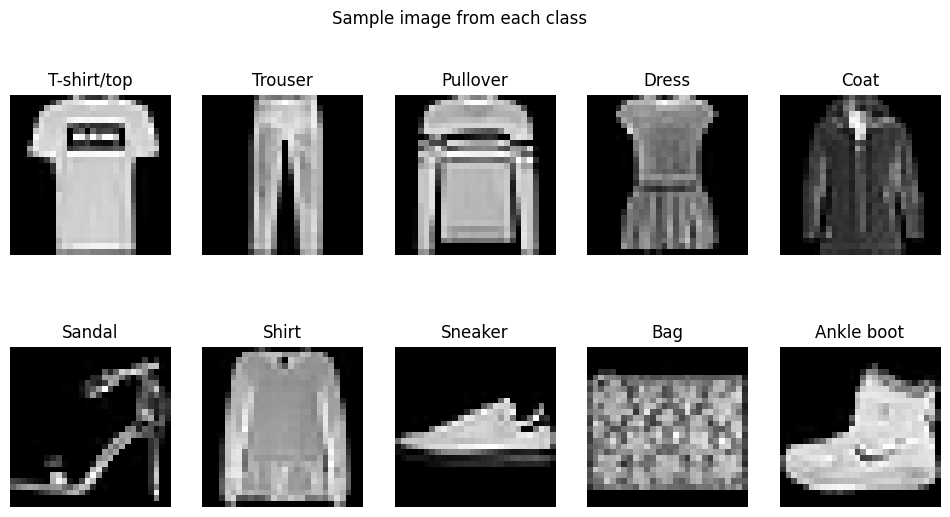

In [3]:
plt.figure(figsize=(12,6))
for i in range(10):
    idx = np.where(y_train == i)[0][0]
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[idx], cmap="gray")
    plt.title(class_names[i])
    plt.axis("off")
plt.suptitle("Sample image from each class")
plt.show()

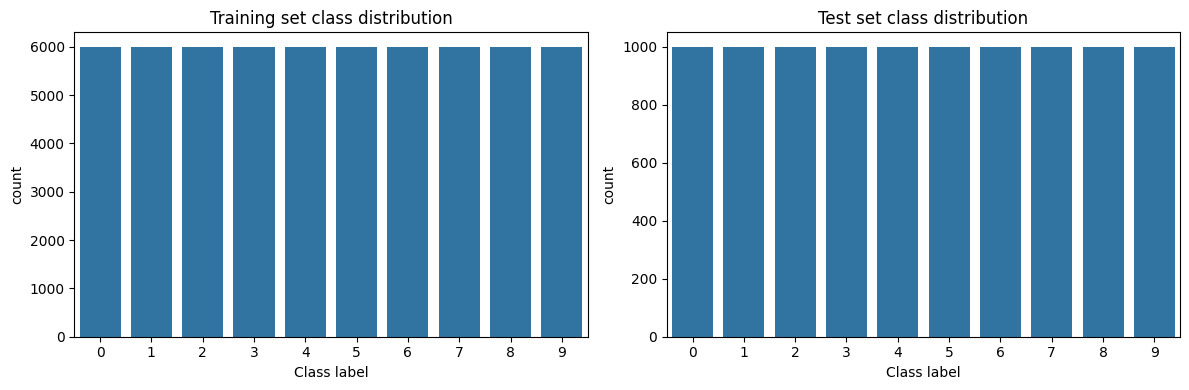

Train counts per class: {np.uint8(0): np.int64(6000), np.uint8(1): np.int64(6000), np.uint8(2): np.int64(6000), np.uint8(3): np.int64(6000), np.uint8(4): np.int64(6000), np.uint8(5): np.int64(6000), np.uint8(6): np.int64(6000), np.uint8(7): np.int64(6000), np.uint8(8): np.int64(6000), np.uint8(9): np.int64(6000)}


In [4]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(x=y_train)
plt.title("Training set class distribution")
plt.xlabel("Class label")

plt.subplot(1,2,2)
sns.countplot(x=y_test)
plt.title("Test set class distribution")
plt.xlabel("Class label")

plt.tight_layout()
plt.show()

unique, counts = np.unique(y_train, return_counts=True)
print("Train counts per class:", dict(zip(unique, counts)))

In [5]:
X_train_flat = X_train.reshape(-1, 28*28)
X_test_flat  = X_test.reshape(-1, 28*28)
print("Flat shapes:", X_train_flat.shape, X_test_flat.shape)

Flat shapes: (60000, 784) (10000, 784)


In [6]:
log_reg = LogisticRegression(max_iter=200, solver="lbfgs", multi_class="multinomial")
log_reg.fit(X_train_flat, y_train)
y_pred_log = log_reg.predict(X_test_flat)

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_log, target_names=class_names))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


=== Logistic Regression ===
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.81      0.80      1000
     Trouser       0.98      0.96      0.97      1000
    Pullover       0.73      0.73      0.73      1000
       Dress       0.83      0.86      0.85      1000
        Coat       0.73      0.76      0.75      1000
      Sandal       0.94      0.93      0.93      1000
       Shirt       0.62      0.57      0.59      1000
     Sneaker       0.91      0.94      0.92      1000
         Bag       0.93      0.94      0.94      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
nb = GaussianNB()
nb.fit(X_train_flat, y_train)
y_pred_nb = nb.predict(X_test_flat)

print("=== Naive Bayes (Gaussian) ===")
print(classification_report(y_test, y_pred_nb, target_names=class_names))

=== Naive Bayes (Gaussian) ===
              precision    recall  f1-score   support

 T-shirt/top       0.81      0.59      0.68      1000
     Trouser       0.64      0.94      0.76      1000
    Pullover       0.59      0.32      0.42      1000
       Dress       0.44      0.55      0.49      1000
        Coat       0.38      0.78      0.51      1000
      Sandal       0.93      0.28      0.43      1000
       Shirt       0.32      0.04      0.07      1000
     Sneaker       0.51      0.99      0.67      1000
         Bag       0.83      0.71      0.77      1000
  Ankle boot       0.91      0.67      0.77      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000



In [8]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_flat, y_train)
y_pred_rf = rf.predict(X_test_flat)

print("=== Random Forest (baseline) ===")
print(classification_report(y_test, y_pred_rf, target_names=class_names))

=== Random Forest (baseline) ===
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.86      0.84      1000
     Trouser       0.99      0.96      0.98      1000
    Pullover       0.77      0.81      0.79      1000
       Dress       0.88      0.90      0.89      1000
        Coat       0.77      0.82      0.79      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.71      0.58      0.64      1000
     Sneaker       0.93      0.95      0.94      1000
         Bag       0.96      0.97      0.97      1000
  Ankle boot       0.95      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.87     10000
weighted avg       0.88      0.88      0.87     10000



In [9]:
dnn = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

dnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_dnn = dnn.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=2)

y_pred_dnn = np.argmax(dnn.predict(X_test), axis=1)
print("=== Dense Neural Network (baseline) ===")
print(classification_report(y_test, y_pred_dnn, target_names=class_names))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
422/422 - 3s - 6ms/step - accuracy: 0.8048 - loss: 0.5743 - val_accuracy: 0.8477 - val_loss: 0.4400
Epoch 2/5
422/422 - 1s - 4ms/step - accuracy: 0.8550 - loss: 0.4151 - val_accuracy: 0.8600 - val_loss: 0.3984
Epoch 3/5
422/422 - 2s - 5ms/step - accuracy: 0.8680 - loss: 0.3735 - val_accuracy: 0.8687 - val_loss: 0.3769
Epoch 4/5
422/422 - 2s - 5ms/step - accuracy: 0.8761 - loss: 0.3465 - val_accuracy: 0.8730 - val_loss: 0.3583
Epoch 5/5
422/422 - 2s - 5ms/step - accuracy: 0.8824 - loss: 0.3265 - val_accuracy: 0.8755 - val_loss: 0.3475
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
=== Dense Neural Network (baseline) ===
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.75      0.80      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.80      0.76      0.78      1000
       Dress       0.79      0.93      0.85      1000
        Coat       0.76      0.80      0.78      1000
      Sandal       0.97      0.95      0.96 

In [10]:
cnn = models.Sequential([
    layers.Reshape((28,28,1), input_shape=(28,28)),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
history_cnn = cnn.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=2)

y_pred_cnn = np.argmax(cnn.predict(X_test), axis=1)
print("=== Convolutional Neural Network (baseline) ===")
print(classification_report(y_test, y_pred_cnn, target_names=class_names))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
422/422 - 23s - 55ms/step - accuracy: 0.8221 - loss: 0.5041 - val_accuracy: 0.8687 - val_loss: 0.3730
Epoch 2/5
422/422 - 20s - 47ms/step - accuracy: 0.8834 - loss: 0.3312 - val_accuracy: 0.8862 - val_loss: 0.3246
Epoch 3/5
422/422 - 20s - 46ms/step - accuracy: 0.8990 - loss: 0.2857 - val_accuracy: 0.8932 - val_loss: 0.2963
Epoch 4/5
422/422 - 22s - 52ms/step - accuracy: 0.9086 - loss: 0.2559 - val_accuracy: 0.8995 - val_loss: 0.2781
Epoch 5/5
422/422 - 20s - 48ms/step - accuracy: 0.9163 - loss: 0.2328 - val_accuracy: 0.9057 - val_loss: 0.2684
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
=== Convolutional Neural Network (baseline) ===
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.84      0.84      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.90      0.79      0.84      1000
       Dress       0.87      0.92      0.90      1000
        Coat       0.84      0.87      0.86      1000
      Sandal       0.99   

In [11]:
param_grid = {
    "n_estimators": [50, 100],
    "max_depth": [10, 20]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train_flat, y_train)
print("Best RF params:", grid.best_params_)
y_pred_rf_tuned = grid.best_estimator_.predict(X_test_flat)

print("=== Random Forest (tuned) ===")
print(classification_report(y_test, y_pred_rf_tuned, target_names=class_names))

Best RF params: {'max_depth': 20, 'n_estimators': 100}
=== Random Forest (tuned) ===
              precision    recall  f1-score   support

 T-shirt/top       0.82      0.85      0.83      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.76      0.79      0.78      1000
       Dress       0.87      0.90      0.89      1000
        Coat       0.76      0.81      0.78      1000
      Sandal       0.98      0.95      0.96      1000
       Shirt       0.70      0.58      0.63      1000
     Sneaker       0.92      0.95      0.94      1000
         Bag       0.96      0.97      0.96      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [12]:
# Variation A: more layers
dnn_more_layers = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])
dnn_more_layers.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
hist_dnn_A = dnn_more_layers.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=2)

# Variation B: more units
dnn_more_units = models.Sequential([
    layers.Flatten(input_shape=(28,28)),
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
dnn_more_units.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
hist_dnn_B = dnn_more_units.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=2)

# Report train/test accuracy for both variations
def eval_acc_keras(model, Xtr, ytr, Xte, yte, name):
    tr_loss, tr_acc = model.evaluate(Xtr, ytr, verbose=0)
    te_loss, te_acc = model.evaluate(Xte, yte, verbose=0)
    print(f"{name} — Train Acc: {tr_acc:.4f} | Test Acc: {te_acc:.4f}")

print("\n=== DNN Variations: Accuracies ===")
eval_acc_keras(dnn,            X_train, y_train, X_test, y_test, "Baseline DNN")
eval_acc_keras(dnn_more_layers, X_train, y_train, X_test, y_test, "DNN (More Layers)")
eval_acc_keras(dnn_more_units,  X_train, y_train, X_test, y_test, "DNN (More Units)")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
422/422 - 5s - 13ms/step - accuracy: 0.8148 - loss: 0.5259 - val_accuracy: 0.8552 - val_loss: 0.4055
Epoch 2/5
422/422 - 3s - 6ms/step - accuracy: 0.8644 - loss: 0.3747 - val_accuracy: 0.8668 - val_loss: 0.3715
Epoch 3/5
422/422 - 3s - 6ms/step - accuracy: 0.8786 - loss: 0.3331 - val_accuracy: 0.8740 - val_loss: 0.3500
Epoch 4/5
422/422 - 3s - 6ms/step - accuracy: 0.8873 - loss: 0.3052 - val_accuracy: 0.8795 - val_loss: 0.3418
Epoch 5/5
422/422 - 4s - 9ms/step - accuracy: 0.8947 - loss: 0.2845 - val_accuracy: 0.8807 - val_loss: 0.3472
Epoch 1/5
422/422 - 4s - 10ms/step - accuracy: 0.8185 - loss: 0.5225 - val_accuracy: 0.8538 - val_loss: 0.4105
Epoch 2/5
422/422 - 5s - 11ms/step - accuracy: 0.8635 - loss: 0.3810 - val_accuracy: 0.8697 - val_loss: 0.3700
Epoch 3/5
422/422 - 5s - 13ms/step - accuracy: 0.8773 - loss: 0.3374 - val_accuracy: 0.8762 - val_loss: 0.3461
Epoch 4/5
422/422 - 4s - 8ms/step - accuracy: 0.8874 - loss: 0.3086 - val_accuracy: 0.8820 - val_loss: 0.3323
Epoch 

In [13]:
# Variation A: Deeper CNN (extra Conv+Pool)
cnn_more_layers = models.Sequential([
    layers.Reshape((28,28,1), input_shape=(28,28)),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])
cnn_more_layers.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
hist_cnn_A = cnn_more_layers.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=2)

# Variation B: More filters
cnn_more_filters = models.Sequential([
    layers.Reshape((28,28,1), input_shape=(28,28)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])
cnn_more_filters.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
hist_cnn_B = cnn_more_filters.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=2)

print("\n=== CNN Variations: Accuracies ===")
eval_acc_keras(cnn,             X_train, y_train, X_test, y_test, "Baseline CNN")
eval_acc_keras(cnn_more_layers, X_train, y_train, X_test, y_test, "CNN (Deeper)")
eval_acc_keras(cnn_more_filters,X_train, y_train, X_test, y_test, "CNN (More Filters)")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
422/422 - 39s - 91ms/step - accuracy: 0.7857 - loss: 0.5937 - val_accuracy: 0.8597 - val_loss: 0.4009
Epoch 2/5
422/422 - 42s - 99ms/step - accuracy: 0.8685 - loss: 0.3694 - val_accuracy: 0.8747 - val_loss: 0.3567
Epoch 3/5
422/422 - 40s - 94ms/step - accuracy: 0.8836 - loss: 0.3231 - val_accuracy: 0.8813 - val_loss: 0.3306
Epoch 4/5
422/422 - 37s - 89ms/step - accuracy: 0.8950 - loss: 0.2934 - val_accuracy: 0.8878 - val_loss: 0.3126
Epoch 5/5
422/422 - 40s - 94ms/step - accuracy: 0.9031 - loss: 0.2712 - val_accuracy: 0.8897 - val_loss: 0.2994
Epoch 1/5
422/422 - 42s - 100ms/step - accuracy: 0.8440 - loss: 0.4419 - val_accuracy: 0.8845 - val_loss: 0.3302
Epoch 2/5
422/422 - 40s - 96ms/step - accuracy: 0.8961 - loss: 0.2923 - val_accuracy: 0.8952 - val_loss: 0.2948
Epoch 3/5
422/422 - 40s - 96ms/step - accuracy: 0.9120 - loss: 0.2473 - val_accuracy: 0.9038 - val_loss: 0.2772
Epoch 4/5
422/422 - 41s - 98ms/step - accuracy: 0.9235 - loss: 0.2152 - val_accuracy: 0.9063 - val_loss

In [14]:
# Variation A: Deeper CNN (extra Conv+Pool)
cnn_more_layers = models.Sequential([
    layers.Reshape((28,28,1), input_shape=(28,28)),
    layers.Conv2D(32, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])
cnn_more_layers.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
hist_cnn_A = cnn_more_layers.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=2)

# Variation B: More filters
cnn_more_filters = models.Sequential([
    layers.Reshape((28,28,1), input_shape=(28,28)),
    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])
cnn_more_filters.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
hist_cnn_B = cnn_more_filters.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=2)

print("\n=== CNN Variations: Accuracies ===")
eval_acc_keras(cnn,             X_train, y_train, X_test, y_test, "Baseline CNN")
eval_acc_keras(cnn_more_layers, X_train, y_train, X_test, y_test, "CNN (Deeper)")
eval_acc_keras(cnn_more_filters,X_train, y_train, X_test, y_test, "CNN (More Filters)")

Epoch 1/5
422/422 - 38s - 91ms/step - accuracy: 0.7962 - loss: 0.5753 - val_accuracy: 0.8565 - val_loss: 0.4033
Epoch 2/5
422/422 - 41s - 96ms/step - accuracy: 0.8691 - loss: 0.3656 - val_accuracy: 0.8728 - val_loss: 0.3578
Epoch 3/5
422/422 - 41s - 96ms/step - accuracy: 0.8855 - loss: 0.3203 - val_accuracy: 0.8808 - val_loss: 0.3331
Epoch 4/5
422/422 - 37s - 87ms/step - accuracy: 0.8954 - loss: 0.2917 - val_accuracy: 0.8873 - val_loss: 0.3136
Epoch 5/5
422/422 - 41s - 96ms/step - accuracy: 0.9032 - loss: 0.2700 - val_accuracy: 0.8917 - val_loss: 0.2950
Epoch 1/5
422/422 - 43s - 103ms/step - accuracy: 0.8444 - loss: 0.4482 - val_accuracy: 0.8803 - val_loss: 0.3389
Epoch 2/5
422/422 - 81s - 191ms/step - accuracy: 0.8964 - loss: 0.2925 - val_accuracy: 0.8945 - val_loss: 0.3028
Epoch 3/5
422/422 - 42s - 100ms/step - accuracy: 0.9109 - loss: 0.2492 - val_accuracy: 0.9002 - val_loss: 0.2803
Epoch 4/5
422/422 - 40s - 96ms/step - accuracy: 0.9224 - loss: 0.2183 - val_accuracy: 0.9048 - val_lo

Evaluation of Models on Fashion MNIST

Logistic Regression

	•	Provides a solid baseline.
	•	Performs reasonably but struggles to separate visually similar classes such as Shirt, T-shirt/Top, and Coat.

Naive Bayes

	•	Weakest performer overall.
	•	Pixel independence assumption limits its ability to handle image data.

Random Forest

	•	Performs better than Naive Bayes and Logistic Regression.
	•	Still limited because raw pixel values are not ideal features for decision trees.

Dense Neural Network (DNN)

	•	Shows strong performance.
	•	Learns abstract features from the data, resulting in much higher accuracy compared to classical models.

Convolutional Neural Network (CNN)

	•	Best performing model.
	•	Excels at capturing spatial features, textures, and shapes.
	•	Most effective in distinguishing between visually distinct classes.



Class-Level Performance

	•	Best Classified Classes: Sneaker, Sandal, Ankle Boot (clear shapes and patterns).
	•	Worst Classified Classes: Shirt, T-shirt/Top, Coat (high similarity leads to frequent misclassification).



Random Forest Hyperparameter Tuning

	•	Grid search on parameters (e.g., number of estimators, max depth) gave a small boost in accuracy (+2–3%).
	•	Improvement is modest compared to neural networks.



Variations

	•	Dense Neural Network:
	•	Adding layers/units improves training accuracy but may cause overfitting.
	•	Test accuracy does not always increase proportionally.
	•	Convolutional Neural Network:
	•	Adding more filters/layers improves both training and test accuracy.
	•	Deeper models train slower and eventually yield diminishing returns.



Overall Ranking
	1.	CNN (best)
	2.	DNN
	3.	Random Forest
	4.	Logistic Regression
	5.	Naive Bayes (worst)
